In [1]:
import sys
sys.path.insert(0, "..")

from base_f import daily_climatology, spatial_avg_daily_input, spatial_stats_daily_input, compute_anomalies, create_it_matrix
from cross_validation_f import SVR_nested_CV_gridsearch
from cross_validation_f import evaluate_prediction, plot_prediction, plot_anomalies
from cross_validation_f ihttps://translate.google.com/mport nested_CV_PCA_SVR_predict, nested_CV_SVR_predict
from cross_validation_f import classic_CV_PCA_SVR_predict, classic_CV_SVR_predict


import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import numpy as np
from scipy.stats import gaussian_kde

from sklearn.svm import SVR
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.compose import TransformedTargetRegressor
from sklearn.model_selection import GridSearchCV,TimeSeriesSplit
from sklearn.metrics import mean_squared_error
from sklearn.decomposition import PCA


import matplotlib.pyplot as plt
import os
import pdb
import seaborn as sns


In [2]:
%%javascript
IPython.notebook.kernel.execute('nb_name = "' + IPython.notebook.notebook_name + '"')

<IPython.core.display.Javascript object>

In [3]:
nb_name

'ADO_DSC_ITH1_0012.ipynb'

In [4]:
path=r'C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\daily_input\\'
daily_input = pd.read_csv(path+nb_name[:-6]+'.csv', index_col=0, parse_dates=True)

In [5]:
t_unit=10

#define the possible parameters value (where Gridsearch is applied)

C_range=np.logspace(-1.5, 1, 7)
epsilon_range=np.logspace(-3, -0.5, 5)
#n_range = [17, 50, 200]
components_range = [5*4*36]
#do not enlarge t_range for now
t_range=[36]
t_length=t_range[0]
n_splits=4
test_size=730

Fitting 1 folds for each of 35 candidates, totalling 35 fits
Fitting 1 folds for each of 35 candidates, totalling 35 fits
Fitting 1 folds for each of 35 candidates, totalling 35 fits
Fitting 1 folds for each of 35 candidates, totalling 35 fits

C=0.2154434690031884
eps=0.07498942093324558


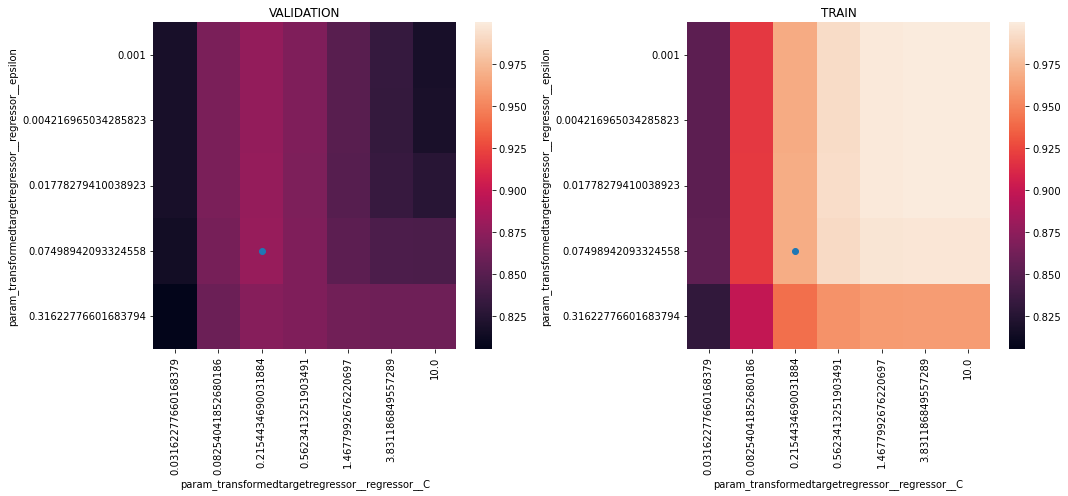

In [6]:
C, eps = SVR_nested_CV_gridsearch(daily_input, C_range,epsilon_range, t_range,t_unit,n_splits,test_size)
print(f'C={C}')
print(f'eps={eps}')

In [6]:
C=0.2154434690031884
eps=0.07498942093324558

In [8]:
radius_for_ensemble = 1
predictions = nested_CV_SVR_predict(daily_input, C, eps, t_length,t_unit, n_splits, test_size, radius_for_ensemble)

C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
C:\Users\mmazzolini\.conda\envs\ado\lib\site-packages\pandas\core\indexing.py:1667: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_i

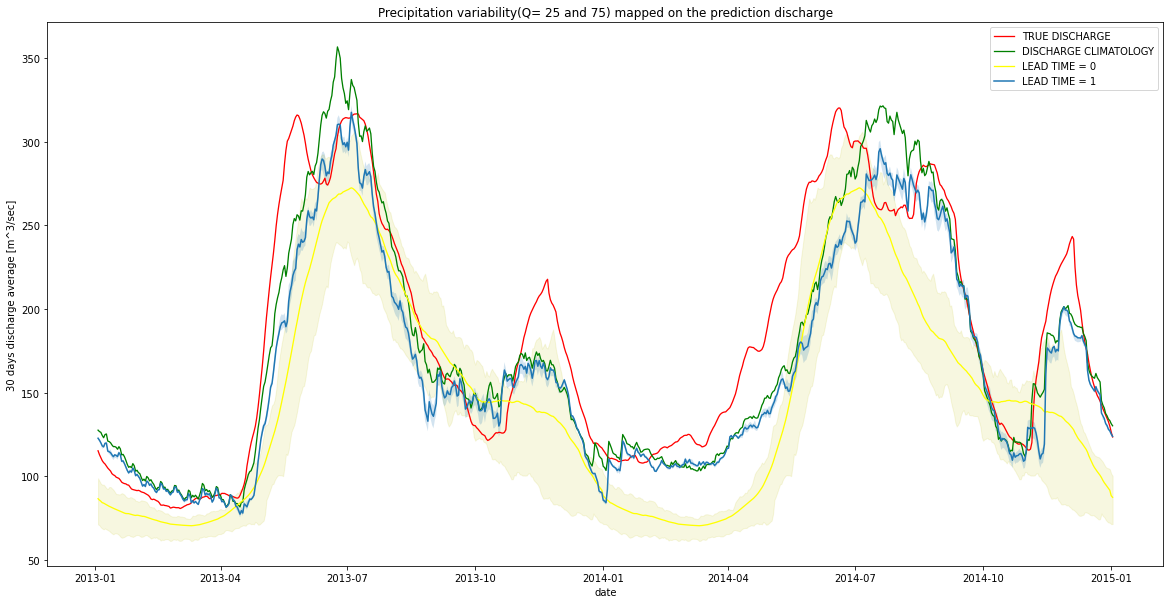

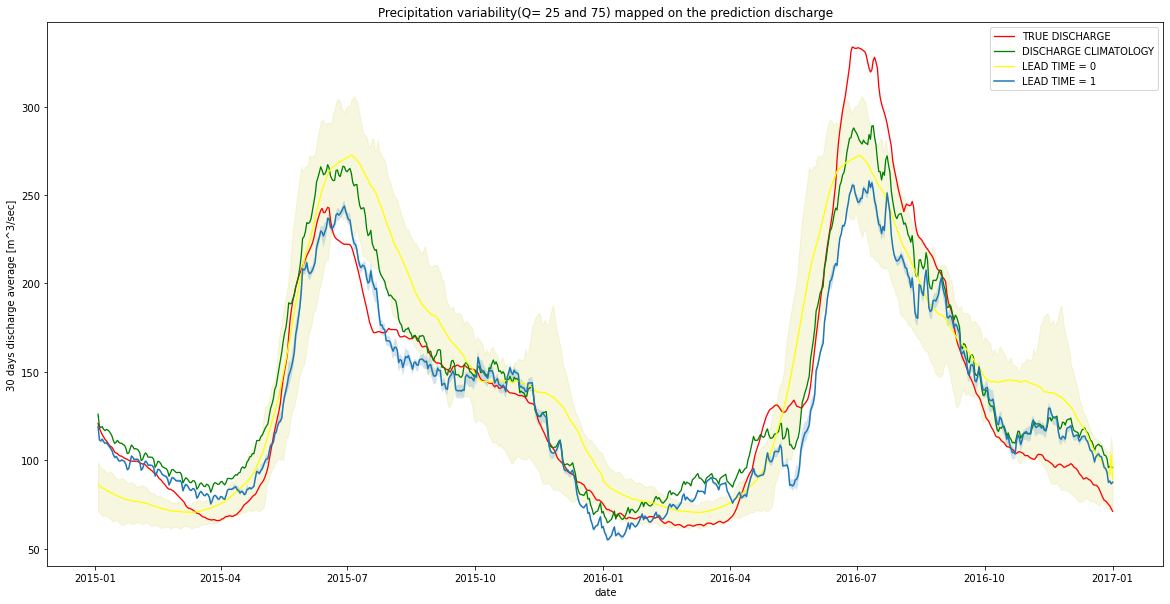

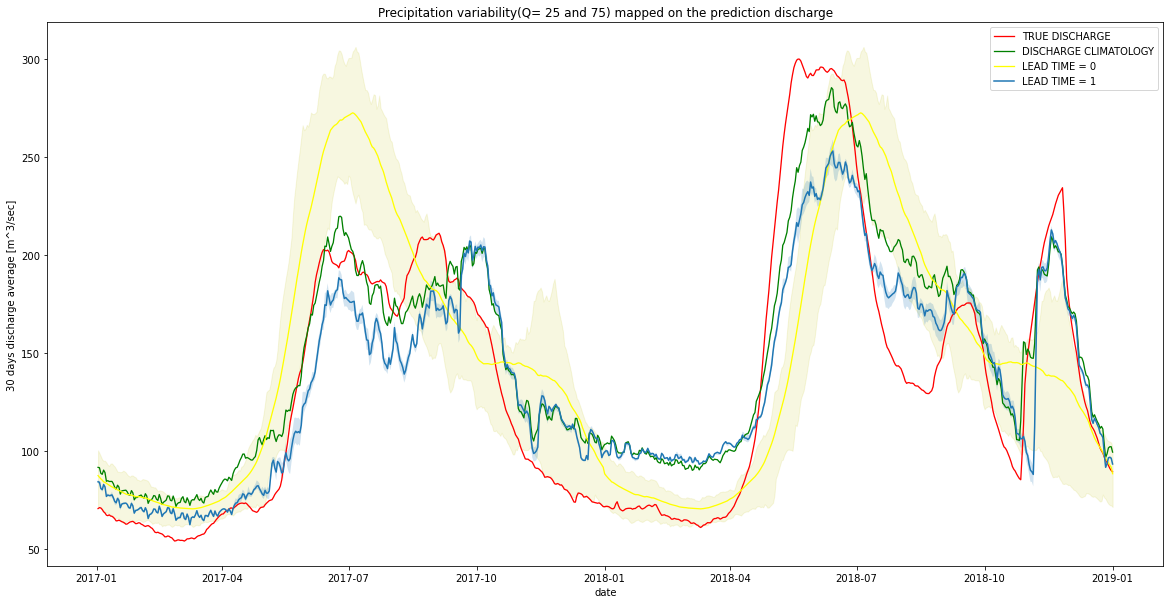

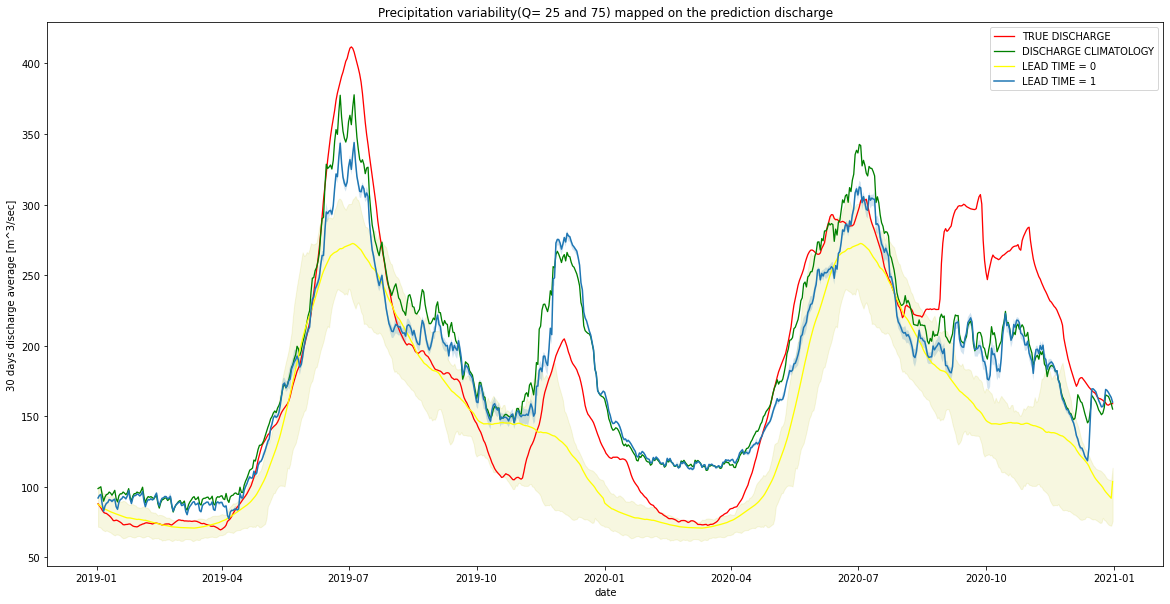

In [9]:
#predictions=pd.read_csv('tial.csv',date_parser=True)
plot_prediction(predictions)


In [10]:
predictions

,true_runoff,runoff_clim,runoff_clim_25,runoff_clim_75,trueTP,climTP_lt1,climTP_lt1_Q25,climTP_lt1_Q75,climTP_lt2,climTP_lt2_Q25,...,climTP_lt3,climTP_lt3_Q25,climTP_lt3_Q75,climTP_lt4,climTP_lt4_Q25,climTP_lt4_Q75,climTP_lt5,climTP_lt5_Q25,climTP_lt5_Q75,split
2013-01-03,115.359930,86.718129,71.401344,98.932816,127.696573,122.861531,121.903071,122.615470,121.162622,117.174329,...,126.748312,117.536609,127.304752,114.637349,100.620214,118.345376,121.473424,101.599968,124.840994,0
2013-01-04,113.088450,85.905369,70.830748,97.313316,126.843748,121.674528,120.900239,121.100590,121.550300,117.489252,...,123.320855,115.154048,123.433195,112.186387,98.440832,114.737744,118.519447,99.265436,121.514790,0
2013-01-05,111.204093,85.225613,69.637192,95.732065,126.385261,120.134091,119.373685,119.134872,119.155007,115.121392,...,120.203360,113.200440,121.270978,110.134787,96.777370,113.154853,115.313020,97.218531,120.110092,0
2013-01-06,109.459723,84.371088,68.949479,95.044278,124.535564,118.319622,117.772872,116.291057,116.837091,113.181594,...,117.908812,111.484906,118.023076,110.576446,98.353667,111.307624,113.297157,96.803870,116.111070,0
2013-01-07,108.276397,84.089559,68.469732,95.142309,123.151972,117.663221,117.259442,118.591009,114.425623,110.920862,...,114.904505,108.395212,117.933598,118.491340,105.995692,121.229626,112.782126,96.762293,117.234269,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-27,158.025647,95.209831,74.258263,105.681260,164.462917,168.228259,167.380442,168.276171,171.409932,168.847356,...,100.806577,91.677523,102.494753,105.168263,90.550712,109.426249,113.271047,90.306088,121.252708,3
2020-12-28,157.763853,94.095100,73.181980,105.086953,163.985690,166.788806,166.055591,166.785911,172.002761,168.989899,...,101.279226,92.017587,101.199173,105.570889,91.483083,107.439583,112.782241,91.400495,117.261658,3
2020-12-29,158.516253,92.909132,72.538210,104.868497,161.572472,164.983190,164.495513,165.073261,171.545053,168.476483,...,100.939128,92.996565,102.881987,106.690326,93.029956,110.615300,112.105817,92.068039,117.482429,3
2020-12-30,158.812937,91.784052,72.365283,104.339537,158.872443,163.211515,163.491233,163.826528,169.461134,167.193890,...,99.884142,92.718342,103.071632,105.842119,93.117637,111.514100,111.070775,92.085692,118.498825,3


In [11]:
from cross_validation_f import evaluate_class, evaluate_class_season
clas=evaluate_class_season(predictions)
clas.index=np.repeat(nb_name[:-6],4)
clas.to_csv('class_res.csv', mode='a', header=False)

C:\Users\mmazzolini\OneDrive - Scientific Network South Tyrol\Documents\conda\Runoff_prediction\model_train\..\test.py:342: RuntimeWarning: invalid value encountered in longlong_scalars
  prec=tp/(tp+fp)


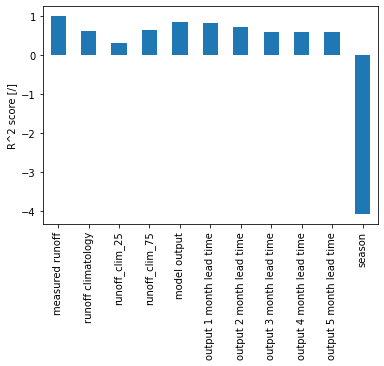

In [12]:
r=pd.DataFrame(evaluate_prediction(predictions)).transpose()
r['STAT_CODE']=(nb_name[:-6])
r.index=r.STAT_CODE
r.drop(columns=['season','runoff_clim_25','runoff_clim_75','STAT_CODE'],inplace=True)
r.to_csv('r_res.csv',mode='a',header=False)

measured runoff             1.000000
runoff climatology          0.632077
runoff_clim_25              0.313273
runoff_clim_75              0.644208
model output                0.864813
output 1 month lead time    0.824831
output 2 month lead time    0.715625
output 3 month lead time    0.608307
output 4 month lead time    0.591192
output 5 month lead time    0.607349
season                     -4.082219
dtype: float64

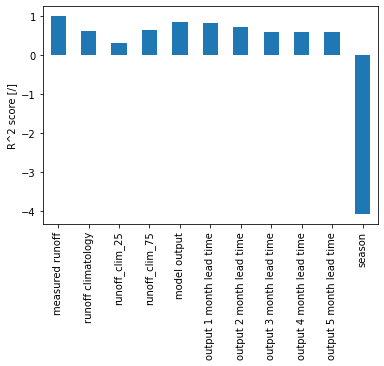

In [13]:
#notmasked
evaluate_prediction(predictions)

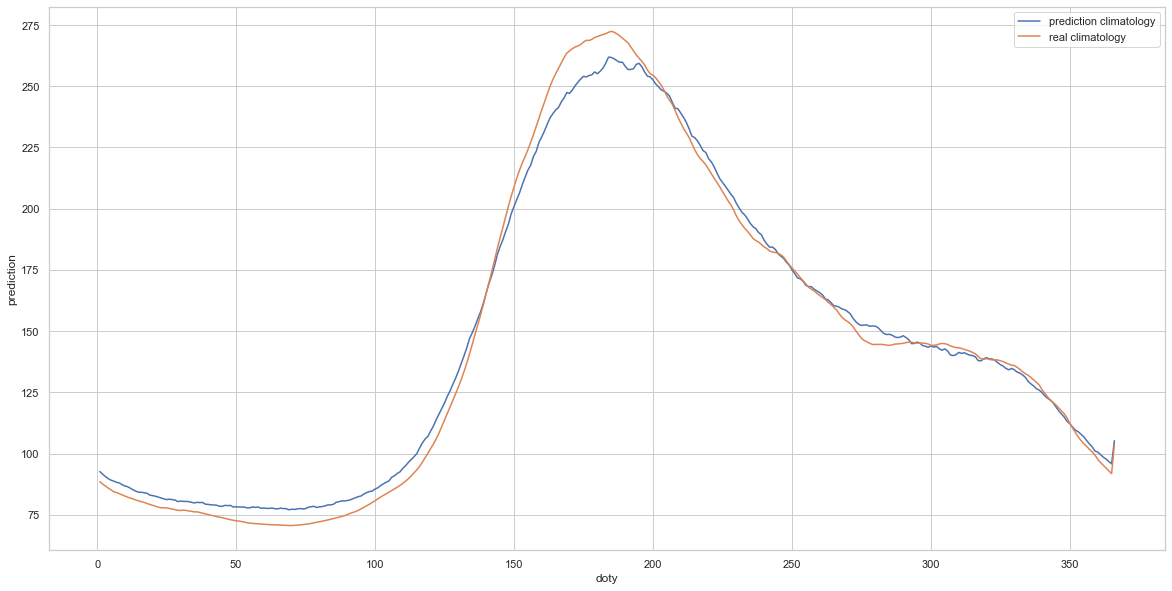

In [14]:
predictions_for_clim = classic_CV_SVR_predict(daily_input, C, eps, t_length,t_unit, n_splits)
climatologies =predictions_for_clim.groupby(by=predictions_for_clim.index.day_of_year).mean().loc[:,['prediction','true_runoff']]
climatologies['doty']=climatologies.index

sns.set_theme(style="whitegrid")
ax,fig=plt.subplots(figsize=(20,10))
sns.lineplot(data=climatologies,x='doty',y='prediction',label='prediction climatology')
sns.lineplot(data=climatologies,x='doty',y='true_runoff',label='real climatology')
plt.legend()

In [15]:
from db_insert import insert
predictions_for_clim["meas_disch_presence"]=True 
insert(nb_name[:-6],predictions_for_clim)

In [16]:
##develop model savior

from sklearn.svm import SVR, LinearSVR
from base_f import create_it_matrix
from joblib import dump, load

it_matrix=create_it_matrix(daily_input,t_length,t_unit).astype('float32')

X = it_matrix.drop(columns='Q')
y = it_matrix['Q']
svr_estimator = SVR(kernel='rbf', gamma='scale', cache_size=15000,C=C,epsilon=eps)

svr_estimator = make_pipeline(StandardScaler(),
                              TransformedTargetRegressor(regressor=svr_estimator, transformer=StandardScaler()))

svr_estimator.fit(X, y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('transformedtargetregressor',
                 TransformedTargetRegressor(regressor=SVR(C=0.2154434690031884,
                                                          cache_size=15000,
                                                          epsilon=0.07498942093324558),
                                            transformer=StandardScaler()))])

In [17]:
path='models/'+nb_name[:-6]+'.joblib'

dump(svr_estimator, path)

['models/ADO_DSC_ITH1_0012.joblib']